In [16]:
import tensorflow as tf
import keras as ke
import numpy as np
import matplotlib.pyplot as plt

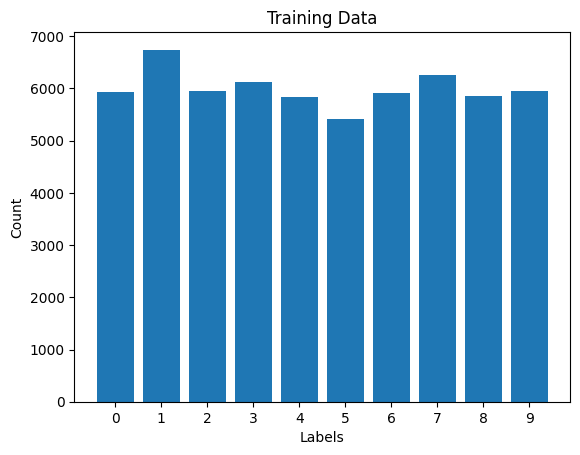

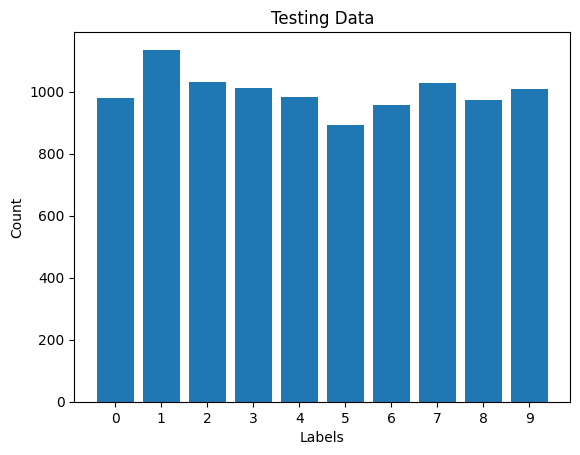

In [17]:
(x_train, y_train), (x_test, y_test) = ke.datasets.mnist.load_data()

def plotBar(data, title):
    plt.title(title)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.bar(range(len(data)), data.values(), align="center")
    plt.xticks(range(len(data)), list(data.keys()))
    plt.show()

unique, counts = np.unique(y_train, return_counts=True)
plotBar(dict(zip(unique, counts)),'Training Data')

unique, counts = np.unique(y_test, return_counts=True)
plotBar(dict(zip(unique, counts)), 'Testing Data')


In [18]:
yTrain = ke.utils.to_categorical(y_train)
yTest = ke.utils.to_categorical(y_test)

total_pixels = x_train.shape[1] * x_train.shape[1]

x_train = np.reshape(x_train, [-1, total_pixels])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, total_pixels])
x_test = x_test.astype('float32') / 255


In [19]:
from keras import layers as lr

network = ke.models.Sequential()

network.add(lr.Dense(256, input_dim=total_pixels))
network.add(lr.Activation('relu'))

network.add(lr.Dropout(0.45))
network.add(lr.Dense(256))
network.add(lr.Activation('relu'))

network.add(lr.Dropout(0.45))
network.add(lr.Dense(256))
network.add(lr.Activation('relu'))

network.add(lr.Dropout(0.45))
network.add(lr.Dense(256))
network.add(lr.Activation('relu'))

network.add(lr.Dropout(0.45))
network.add(lr.Dense(10))
network.add(lr.Activation('softmax'))
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 activation_10 (Activation)  (None, 256)               0         
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 activation_11 (Activation)  (None, 256)               0         
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 256)              

In [20]:
network.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [21]:
network.fit(x_train, yTrain, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5950 - accuracy: 0.8109
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2448 - accuracy: 0.9311
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1918 - accuracy: 0.9472
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1691 - accuracy: 0.9521
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1507 - accuracy: 0.9581
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1415 - accuracy: 0.9607
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1297 - accuracy: 0.9633
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1168 - accuracy: 0.9680
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1116 - accuracy: 0.9685
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1121 - accuracy: 0.9682

In [22]:
loss, acc = network.evaluate(x_test, yTest, batch_size=128)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9760

Test accuracy: 97.6%
